**Question No.1. Vision Dataset**
---
Fashion MNIST-An MNIST-like dataset of 70,000 28x28 labelled fashion images. 
Please find your dataset from the link- https://www.tensorflow.org/datasets/catalog/fashion_mnist.

Prepare a python notebook (recommended-use Google Colab) to build, train and evaluate a deep neural network on the F-MNIST dataset. Read the instructions carefully.

**Import Libraries/Dataset**
---


1.   Import required libraries (recommended-use tensorflow/keraslibrary).
2.   Import the dataset (use Google Drive if required).
3.   Check the GPU available (recommended-use free GPU provided by Google Colab).




##Import Libraries

In [1]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD

import random
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

from sklearn.metrics import confusion_matrix, classification_report


In [2]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of numbers will appear every time. 
tf.random.set_seed(42)  # sets the graph-level random seed

## Dataset

In [3]:
# Use the MNIST dataset  of Keras.

mnist = tf.keras.datasets.fashion_mnist  # https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist 

(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()



4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print(np.unique(Ytrain,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [5]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Check the GPU available

In [6]:
if tf.test.gpu_device_name(): 

    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [7]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()

# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))

printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=0cceb3f07a10a5363b4b5a97aa8fcb3cc7f659e6116fb533482765b33291f39f
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.2 GB  | Proc size: 1.1 GB
GPU RAM Free: 14852MB | Used: 227MB | Util   2% | Total 15079MB


##Data Visualization
---
1.   Plot at least one sample from each class of the dataset (use matplotlib/seaborn / any other library ).
2.   Print the shapes of train and test data

**Plot of Sample train data**

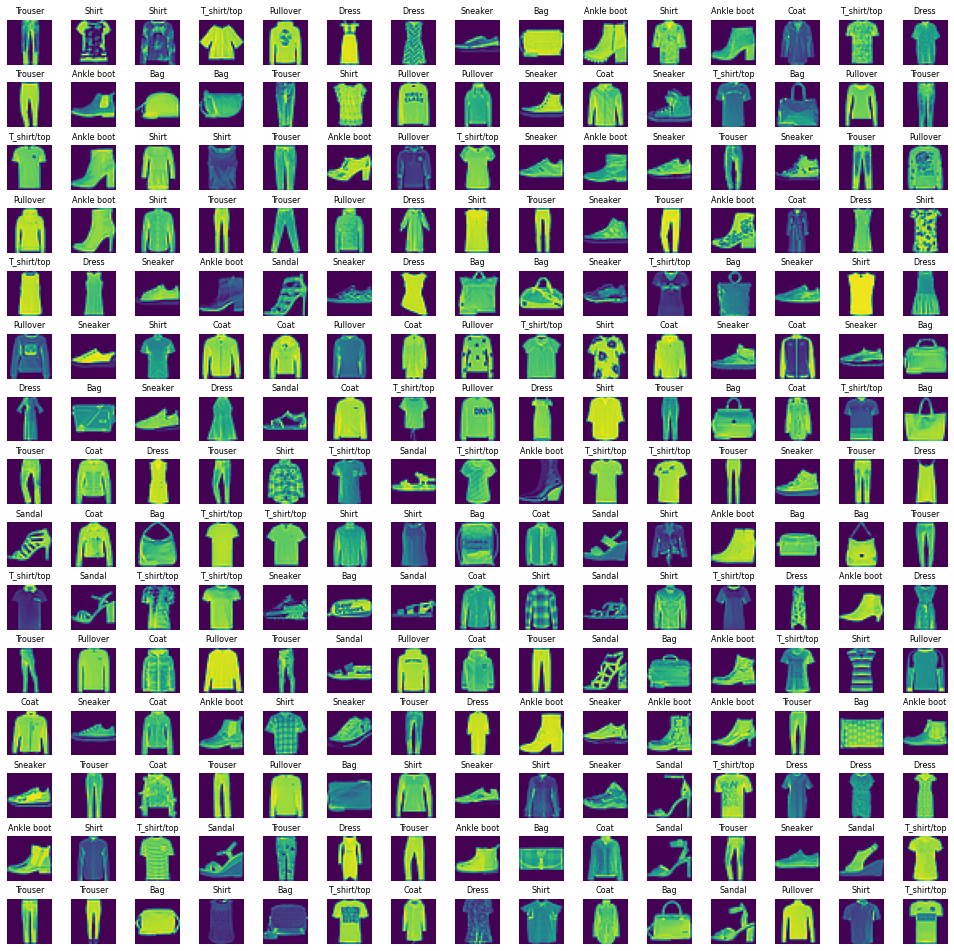

In [8]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(Xtrain) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( Xtrain[index] )
    label_index = int(Ytrain[index])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

**Shapes of Train and Test Data**

In [9]:
# size of the datsets

print("\n Xtrain :\n")
print(Xtrain.shape)

print("\n Xtest :\n")
print(Xtest.shape)

print("\n Ytrain :\n")
print(Ytrain.shape)

print("\n Ytest :\n")
print(Ytest.shape)


 Xtrain :

(60000, 28, 28)

 Xtest :

(10000, 28, 28)

 Ytrain :

(60000,)

 Ytest :

(10000,)


# **Data Pre-processing**
---
1.   Bring the train and test data in the required format.

In [10]:
# Normalize the data
# 60000 input images are in the train set.
# 10000 input images are in the test set.

Xtrain = Xtrain.reshape((60000, 28*28))    # reshape the input set to size 28*28. VEctor of length 784
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

Xtest = Xtest.reshape((10000, 28*28))      # reshape the input set to size 28*28. 
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32


ytestdata = Ytest.copy() # retaining Ytest for future use.

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

In [11]:
# print  sample data after normalizing

print('Xtrain \n', Xtrain[10,:10])
print('Xtest \n', Xtest[10,:10])
print('Ytrain \n', Ytrain[10,])
print('Ytest \n', Ytest[10,])

Xtrain 
 [0.         0.         0.         0.         0.         0.
 0.         0.04313726 0.5568628  0.78431374]
Xtest 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ytrain 
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ytest 
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# **Model Building**
---
1.   Sequential Model layers-Use AT LEAST3 denselayers with appropriate inputfor each. Choose the best number for hidden units and give reasons.
2.   Add L2 regularization to all the layers.
3.   Add one layer of dropoutat the appropriate position and give reasons.
4.   Choose the appropriate activation function for all the layers.
5.   Print the model summary.



 **DNN Model**


Using Keras, create the DNN or Sequential Model

In [12]:
# Create a model object

dnnModel = models.Sequential()

Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [13]:
# Layer 1 = input layer
# specify the input size for in the first layer. --  with Regularizers

dnnModel.add(layers.Dense(512, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01), 
                          activity_regularizer=regularizers.l2(0.01), 
                          input_shape= (28*28,)
                          ))

# Layer 2 = hidden layer  with Regularizers
dnnModel.add(layers.Dense(256, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01),
                          activity_regularizer=regularizers.l2(0.01)
                          ))

# Add dropout of 50% to layer 2
dnnModel.add(layers.Dropout(0.5))

# Layer 3 = hidden layer  with Regularizers
dnnModel.add(layers.Dense(128, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01),
                          activity_regularizer=regularizers.l2(0.01)
                          ))

# Layer 4 = output layer  with Regularizers
dnnModel.add(layers.Dense(10, activation='softmax', 
                          kernel_regularizer=regularizers.l2(0.01),
                          activity_regularizer=regularizers.l2(0.01)
                          ))

dnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


**Reason** for choosing the above set of DNN Layers, respective number of nodes and position of the dropout layer is based on how good the model performed based on various trialed combination that gave the best accuracy.Also dropout is placed in a layer where they are fully connected and having greater number of parameters which result in good accuracy. 

# **Model Compilation**
---


1.   Compile the model with the appropriate loss function.
2.   Use an appropriate optimizer.Give reasons for the choice of learning rate and its value.
3.    Use accuracy as metric.



Regularization and Optimizations of DNN

In [14]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
NUM_EPOCHS = 25
INIT_LR = 0.01
BS = 64
opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)        
dnnModel.compile( optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'] )

**Reason** for the choice of learning rate and its value : Upon choosing the above given Learning rate, best accuracy for data was acheived for the SGD optimizer.

# **Model Training**

---


1.   Train the model for an appropriate number of epochs (print the train and validation accuracy/loss for each epoch).Use the appropriate batch size.
2.   Plot the loss and accuracy history graphs. Print the total time taken for training.



**Train the Model**

In [15]:
# train the model
import time
start_time = time.time()
h = dnnModel.fit( Xtrain, Ytrain, epochs=NUM_EPOCHS, validation_split=0.2, batch_size=BS)
print("--- %s seconds taken for training---" % (time.time() - start_time))

Epoch 1/25
750/750 [==============================] - 3s 3ms/step - loss: 5.3749 - accuracy: 0.7343 - val_loss: 2.1227 - val_accuracy: 0.8083
Epoch 2/25
750/750 [==============================] - 2s 3ms/step - loss: 1.6729 - accuracy: 0.8133 - val_loss: 1.4153 - val_accuracy: 0.8213
Epoch 3/25
750/750 [==============================] - 2s 3ms/step - loss: 1.3781 - accuracy: 0.8246 - val_loss: 1.3128 - val_accuracy: 0.8283
Epoch 4/25
750/750 [==============================] - 2s 3ms/step - loss: 1.3308 - accuracy: 0.8258 - val_loss: 1.2993 - val_accuracy: 0.8307
Epoch 5/25
750/750 [==============================] - 2s 3ms/step - loss: 1.3173 - accuracy: 0.8293 - val_loss: 1.2871 - val_accuracy: 0.8307
Epoch 6/25
750/750 [==============================] - 2s 3ms/step - loss: 1.3088 - accuracy: 0.8325 - val_loss: 1.2773 - val_accuracy: 0.8402
Epoch 7/25
750/750 [==============================] - 2s 3ms/step - loss: 1.3026 - accuracy: 0.8347 - val_loss: 1.2772 - val_accuracy: 0.8328
Epoch 

In [16]:
print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy ', h.history['accuracy'][-1])

Final training loss 	 1.2759511470794678
Final training accuracy  0.8424166440963745


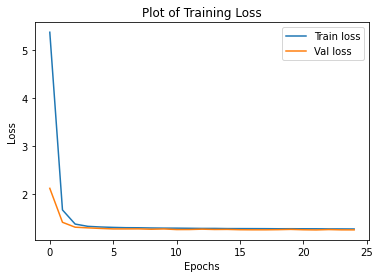

In [17]:
# plot the training loss

plt.plot(h.history['loss'], label='Train loss')
plt.plot(h.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

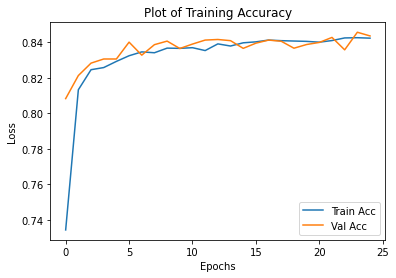

In [18]:
# plot the training accuracy

plt.plot(h.history['accuracy'], label='Train Acc')
plt.plot(h.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Accuracy')
plt.legend()
plt.show()

# **Model Evaluation**

---


1.   Print the final test/validation loss and accuracy.
2.   Print confusion matrix and classification report for the validation dataset. Write a summary for the best and worst performing class and the overall trend.




**Testing the Model**

In [19]:
# testing the model

testLoss, testAccuracy = dnnModel.evaluate( Xtest, Ytest)

313/313 [==============================] - 1s 2ms/step - loss: 1.2740 - accuracy: 0.8339


In [20]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 1.2740451097488403
Testing accuracy  0.833899974822998


**Confusion matrix and classification report for the validation dataset**

In [21]:
prediction = dnnModel.predict_classes(Xtest)
print(prediction)
print(ytestdata.shape)
print(ytestdata)
print(confusion_matrix(ytestdata,prediction))
print(classification_report(ytestdata,prediction))
# dnnModel1
# dnnModel2

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[9 2 1 ... 8 1 5]
(10000,)
[9 2 1 ... 8 1 5]
[[794   1   9  56   3   5 117   0  14   1]
 [  0 941  12  38   5   0   2   0   2   0]
 [ 13   0 714   6 156   0  99   0  12   0]
 [ 34   7   6 845  48   1  53   0   5   1]
 [  0   0  84  25 802   0  84   0   5   0]
 [  0   0   0   2   0 901   0  58   4  35]
 [157   1 110  32 112   1 560   0  27   0]
 [  0   0   0   0   0  45   0 901   0  54]
 [  0   0   8   9   3  11  14   4 950   1]
 [  0   0   0   0   0  21   0  47   1 931]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1000
           1       0.99      0.94      0.97      1000
           2       0.76    

**Summary for the best and worst performing class and the overall trend.**

It is observed that class 6 has lowest set of precision,recall and f1-score,
while class 1 has highest precision and f1-score and class 8 has highest recall

# **Hyperparameter Tuning**

---
Build two more models by changing the following hyperparameters one at a time

Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the instructions above for each additional model.

1.   Network Depth: Change the number of hidden layers and hidden units for each layer
2.   Regularization: Train a model without regularization

Write a comparison between each model and give reasonsfor the difference in results. Also, make a comparison with the state-of-the-art accuracy for this dataset.

## Network Depth: Change the number of hidden layers and hidden units for each layer

1. Model Building

 **DNN Model**

---




Using Keras, create the DNN or Sequential Model

In [22]:
# Create a model object

dnnModel1 = models.Sequential()

Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [23]:
# Layer 1 = input layer
# specify the input size for in the first layer. --  with Regularizers

dnnModel1.add(layers.Dense(512, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01), 
                          activity_regularizer=regularizers.l2(0.01), 
                          input_shape= (28*28,)
                          ))

# Layer 2 = hidden layer  with Regularizers
dnnModel1.add(layers.Dense(300, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01),
                          activity_regularizer=regularizers.l2(0.01)
                          ))
# Add dropout of 50% to layer 2
dnnModel1.add(layers.Dropout(0.5))

# Layer 3 = hidden layer  with Regularizers
dnnModel1.add(layers.Dense(150, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01),
                          activity_regularizer=regularizers.l2(0.01)
                          ))
# Add dropout of 50% to layer 3
# dnnModel1.add(layers.Dropout(0.5))

# Layer 4 = hidden layer  with Regularizers
dnnModel1.add(layers.Dense(75, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01),
                          activity_regularizer=regularizers.l2(0.01)
                          ))

# Layer 5 = output layer  with Regularizers
dnnModel1.add(layers.Dense(10, activation='softmax', 
                          kernel_regularizer=regularizers.l2(0.01),
                          activity_regularizer=regularizers.l2(0.01)
                          ))

dnnModel1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 300)               153900    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               45150     
_________________________________________________________________
dense_7 (Dense)              (None, 75)                11325     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                760       
Total params: 613,055
Trainable params: 613,055
Non-trainable params: 0
________________________________________________

2. Model Compilation

Regularization and Optimizations of DNN

In [24]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
NUM_EPOCHS = 25
INIT_LR = 0.01
BS = 64
opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)       
dnnModel1.compile( optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'] )

3. Model Training

**Train the Model**

In [25]:
# train the model
h1 = dnnModel1.fit( Xtrain, Ytrain, epochs=NUM_EPOCHS, validation_split=0.2, batch_size=BS)

Epoch 1/25
750/750 [==============================] - 3s 3ms/step - loss: 6.0877 - accuracy: 0.6515 - val_loss: 2.3783 - val_accuracy: 0.7547
Epoch 2/25
750/750 [==============================] - 2s 3ms/step - loss: 1.8337 - accuracy: 0.7789 - val_loss: 1.5337 - val_accuracy: 0.8161
Epoch 3/25
750/750 [==============================] - 2s 3ms/step - loss: 1.4793 - accuracy: 0.8063 - val_loss: 1.4253 - val_accuracy: 0.8181
Epoch 4/25
750/750 [==============================] - 2s 3ms/step - loss: 1.4197 - accuracy: 0.8221 - val_loss: 1.4151 - val_accuracy: 0.8234
Epoch 5/25
750/750 [==============================] - 2s 3ms/step - loss: 1.4016 - accuracy: 0.8279 - val_loss: 1.3692 - val_accuracy: 0.8397
Epoch 6/25
750/750 [==============================] - 2s 3ms/step - loss: 1.3883 - accuracy: 0.8357 - val_loss: 1.3787 - val_accuracy: 0.8398
Epoch 7/25
750/750 [==============================] - 3s 3ms/step - loss: 1.3817 - accuracy: 0.8397 - val_loss: 1.3607 - val_accuracy: 0.8393
Epoch 

In [26]:
print('Final training loss \t', h1.history['loss'][-1])
print('Final training accuracy ', h1.history['accuracy'][-1])

Final training loss 	 1.343229055404663
Final training accuracy  0.8557708263397217


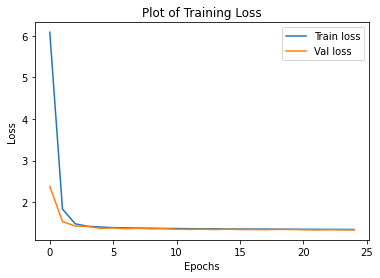

In [27]:
# plot the training loss

plt.plot(h1.history['loss'], label='Train loss')
plt.plot(h1.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

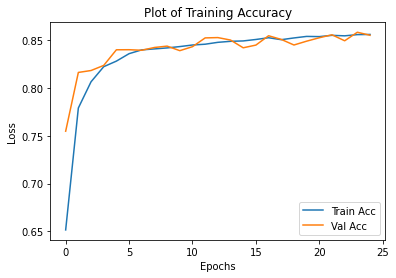

In [28]:
# plot the training accuracy

plt.plot(h1.history['accuracy'], label='Train Acc')
plt.plot(h1.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Accuracy')
plt.legend()
plt.show()

4. Model Evaluation


**Testing the Model**

In [29]:
# testing the model

testLoss1, testAccuracy1 = dnnModel1.evaluate( Xtest, Ytest)

313/313 [==============================] - 1s 3ms/step - loss: 1.3486 - accuracy: 0.8442


In [30]:
print('Testing loss \t', testLoss1)
print('Testing accuracy ', testAccuracy1)

Testing loss 	 1.3485900163650513
Testing accuracy  0.8442000150680542


**Confusion matrix and classification report for the validation dataset**

In [31]:
prediction1 = dnnModel1.predict_classes(Xtest)
print(prediction1)
print(ytestdata.shape)
print(ytestdata)
print(confusion_matrix(ytestdata,prediction1))
print(classification_report(ytestdata,prediction1))
# dnnModel1
# dnnModel2

[9 2 1 ... 8 1 5]
(10000,)
[9 2 1 ... 8 1 5]
[[792   0   6  48   5   1 129   2  17   0]
 [  0 944   3  40   9   0   2   0   2   0]
 [  8   0 727   7 157   0  92   0   9   0]
 [ 27   5   5 846  54   0  60   0   3   0]
 [  0   0  88  20 817   0  69   0   6   0]
 [  0   1   0   0   0 912   0  51   3  33]
 [165   1 111  26  93   0 581   0  23   0]
 [  0   0   0   0   0  31   0 920   0  49]
 [  0   1   9   6   4   3  15   5 957   0]
 [  0   0   1   0   0  17   0  35   1 946]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1000
           1       0.99      0.94      0.97      1000
           2       0.77      0.73      0.75      1000
           3       0.85      0.85      0.85      1000
           4       0.72      0.82      0.76      1000
           5       0.95      0.91      0.93      1000
           6       0.61      0.58      0.60      1000
           7       0.91      0.92      0.91      1000
           8       0.94      0.96    

**Summary for the best and worst performing class and the overall trend.**

It is observed that class 6 has lowest set of precision,recall and f1-score,
while class 1 has highest precision and f1-score and class 8 has highest recall

## Regularization: Train a model without regularization

1. Model Building

 **DNN Model**

---




Using Keras, create the DNN or Sequential Model

In [32]:
# Create a model object

dnnModel2 = models.Sequential()

Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [33]:
# Layer 1 = input layer
# specify the input size for in the first layer. --  without Regularizers

dnnModel2.add(layers.Dense(512, activation='relu',
                          input_shape= (28*28,)
                          ))

# Layer 2 = hidden layer  without Regularizers
dnnModel2.add(layers.Dense(256, activation='relu'))
# Add dropout of 50% to layer 2
dnnModel2.add(layers.Dropout(0.5))

# Layer 3 = hidden layer  without Regularizers
dnnModel2.add(layers.Dense(128, activation='relu'))

# Layer 4 = output layer  without Regularizers
dnnModel2.add(layers.Dense(10, activation='softmax'))

dnnModel2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


2. Model Compilation

Regularization and Optimizations of DNN

In [34]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
NUM_EPOCHS = 25
INIT_LR = 0.01
BS = 64
opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)        
dnnModel2.compile( optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

3. Model Training

In [35]:
# train the model

h2 = dnnModel2.fit( Xtrain, Ytrain, epochs=NUM_EPOCHS, validation_split=0.2, batch_size=BS)

Epoch 1/25
750/750 [==============================] - 2s 3ms/step - loss: 0.6532 - accuracy: 0.7650 - val_loss: 0.4388 - val_accuracy: 0.8455
Epoch 2/25
750/750 [==============================] - 2s 3ms/step - loss: 0.4420 - accuracy: 0.8407 - val_loss: 0.3995 - val_accuracy: 0.8515
Epoch 3/25
750/750 [==============================] - 2s 3ms/step - loss: 0.3961 - accuracy: 0.8567 - val_loss: 0.3692 - val_accuracy: 0.8636
Epoch 4/25
750/750 [==============================] - 2s 3ms/step - loss: 0.3695 - accuracy: 0.8667 - val_loss: 0.3709 - val_accuracy: 0.8641
Epoch 5/25
750/750 [==============================] - 2s 3ms/step - loss: 0.3482 - accuracy: 0.8735 - val_loss: 0.3641 - val_accuracy: 0.8684
Epoch 6/25
750/750 [==============================] - 2s 3ms/step - loss: 0.3329 - accuracy: 0.8793 - val_loss: 0.3404 - val_accuracy: 0.8774
Epoch 7/25
750/750 [==============================] - 2s 3ms/step - loss: 0.3206 - accuracy: 0.8833 - val_loss: 0.3303 - val_accuracy: 0.8796
Epoch 

In [36]:
print('Final training loss \t', h2.history['loss'][-1])
print('Final training accuracy ', h2.history['accuracy'][-1])

Final training loss 	 0.22331710159778595
Final training accuracy  0.9182083606719971


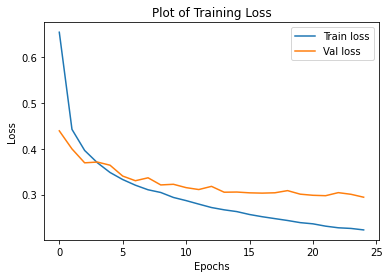

In [37]:
# plot the training loss

plt.plot(h2.history['loss'], label='Train loss')
plt.plot(h2.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

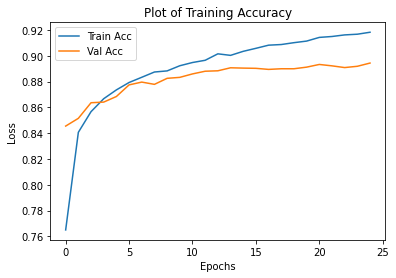

In [38]:
# plot the training accuracy

plt.plot(h2.history['accuracy'], label='Train Acc')
plt.plot(h2.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Accuracy')
plt.legend()
plt.show()

4. Model Evaluation

In [39]:
# testing the model

testLoss2, testAccuracy2 = dnnModel2.evaluate( Xtest, Ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.3191 - accuracy: 0.8860


In [40]:
print('Testing loss \t', testLoss2)
print('Testing accuracy ', testAccuracy2)

Testing loss 	 0.3191433846950531
Testing accuracy  0.8859999775886536


**Confusion matrix and classification report for the validation dataset**

In [41]:
prediction2 = dnnModel2.predict_classes(Xtest)
print(prediction2)
print(ytestdata.shape)
print(ytestdata)
print(confusion_matrix(ytestdata,prediction2))
print(classification_report(ytestdata,prediction2))
# dnnModel1
# dnnModel2

[9 2 1 ... 8 1 5]
(10000,)
[9 2 1 ... 8 1 5]
[[842   0  16  23   2   0 110   0   7   0]
 [  2 968   2  23   3   0   2   0   0   0]
 [ 12   1 823  13  78   1  70   0   2   0]
 [ 18   6   8 886  39   0  37   1   5   0]
 [  0   1 108  26 810   0  54   0   1   0]
 [  0   0   0   0   0 961   0  25   1  13]
 [117   2  91  25  68   0 690   0   7   0]
 [  0   0   0   0   0  17   0 960   0  23]
 [  7   0   3   5   3   2   8   6 966   0]
 [  0   0   0   0   0   6   1  39   0 954]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.78      0.82      0.80      1000
           3       0.89      0.89      0.89      1000
           4       0.81      0.81      0.81      1000
           5       0.97      0.96      0.97      1000
           6       0.71      0.69      0.70      1000
           7       0.93      0.96      0.95      1000
           8       0.98      0.97    

**Summary for the best and worst performing class and the overall trend.**

It is observed that class 6 has lowest set of precision,recall and f1-score,
while class 1 has highest precision and f1-score and class 8 & class 1 has highest recall

# **Model Comparisons**

---



Write a comparison between each model and give reasons for the difference in results. 
Also, make a comparison with the state-of-the-art accuracy for this dataset.

In [42]:
print('Final training loss - h  -->\t', h.history['loss'][-1])
print('Final training loss - h1  --> \t', h1.history['loss'][-1])
print('Final training loss - h2  --> \t', h2.history['loss'][-1])

print('\n')

print('Final training accuracy - h  --> ', h.history['accuracy'][-1])
print('Final training accuracy - h1  --> ', h1.history['accuracy'][-1])
print('Final training accuracy - h3  --> ', h2.history['accuracy'][-1])

Final training loss - h  -->	 1.2759511470794678
Final training loss - h1  --> 	 1.343229055404663
Final training loss - h2  --> 	 0.22331710159778595


Final training accuracy - h  -->  0.8424166440963745
Final training accuracy - h1  -->  0.8557708263397217
Final training accuracy - h3  -->  0.9182083606719971


In [43]:
print('Testing loss for dnnModel \t', testLoss)
print('Testing loss for dnnModel1 \t', testLoss1)
print('Testing loss for dnnModel2 \t', testLoss2)

print('\n')

print('Testing accuracy for dnnModel ', testAccuracy)
print('Testing accuracy for dnnModel1 ', testAccuracy1)
print('Testing accuracy for dnnModel2 ', testAccuracy2)

Testing loss for dnnModel 	 1.2740451097488403
Testing loss for dnnModel1 	 1.3485900163650513
Testing loss for dnnModel2 	 0.3191433846950531


Testing accuracy for dnnModel  0.833899974822998
Testing accuracy for dnnModel1  0.8442000150680542
Testing accuracy for dnnModel2  0.8859999775886536


Analysis from above observed results :



1.   Model 2 has highest Training loss while Model 3 has lowest
2.   Model 3 has highest Training accuracy while Model 1 has lowest
3.   Model 2 has highest Testing loss while Model 3 has lowest
4.   Model 3 has highest Testing accuracy while Model 1 has lowest



From the 3 models created, the maximim accuracy (Testing) achieved is above 88%.
state-of-the-art accuracy for this dataset is more than 90%